In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Programming Assignment 6

---

## **MNIST Classification with Keras**

**Objective:**

The objective of the assignment is to create and train a Neural Network for a given dataset. The dataset need to be preprocessed first. After training, we can evalute the model's performance by making predictions on the test set. After completing this assignment, you should be familiar with the following:

* How to load a Keras dataset?

* How to one-hot encode the labels?

* How to reshape the dataset?

* How to normalize the features in the dataset for better results?

* How to create and train a Neural Network?

* How to evaluate the results of the NN?

We will load and process the MNIST dataset during this assignment. The MNIST dataset is developed for recognizing the 10 handwritten digits, with 60,000 images in the training set and 10,000 images in the test set. Images in the dataset are grayscaled and have 28x28 pixels.


**Deliverables:**

*   This colab notebook with python codes

Total Marks: 25 = 2 + 2 + 2 + 2 + 8 + 4 + 2 + 3.
---


##**Q1. Load the dataset**

For this question, you need to implement the function `load_mnist_dataset` that does the followings (**2 marks**):

* Load the MNIST dataset (Hint: see https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data);
* Separate the training data and labels, as well as test data and labels.

In [2]:
def load_mnist_dataset():
  '''
  RETURN
    x_train: numpy array
    y_train: numpy array
    x_test: numpy array
    y_test: numpy array
  '''
  x_train, y_train, x_test, y_test = None, None, None, None
  # START CODE HERE
  data = tf.keras.datasets.mnist.load_data()
  x_train, y_train, x_test, y_test = data[0][0], data[0][1], data[1][0], data[1][1]
  
  # END CODE HERE
  return x_train, y_train, x_test, y_test

x_train, y_train, x_test, y_test = load_mnist_dataset()

11490434/11490434 [==============================] - 0s 0us/step


When you run this code, you should get the expected output as shown below:


In [3]:
print("Shape of training set: ", x_train.shape)
print("Shape of testing set: ", x_test.shape)
print("Shape of training labels: ", y_train.shape)
print("Shape of testing labels: ", y_test.shape)

Shape of training set:  (60000, 28, 28)
Shape of testing set:  (10000, 28, 28)
Shape of training labels:  (60000,)
Shape of testing labels:  (10000,)


Expected output :

```
Shape of training set:  (60000, 28, 28)
Shape of testing set:  (10000, 28, 28)
Shape of training labels:  (60000,)
Shape of testing labels:  (10000,)
```




And if you run this cell, it will show an image of the digit $5$.

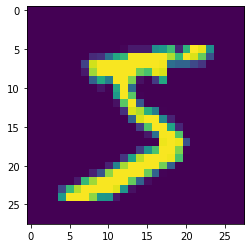

In [4]:
plt.imshow(x_train[0])
plt.show()

## **Q2. One-hot encoding of the dataset**
The dataset contains images of handwritten digits. Hence, they belong to one of the 10 categories, 0 to 9, depending on the digit they represent. 

However, to be able to exploit the dataset more easily, we want the true labels to be encoded in the same format. Thus, we will do **one-hot encoding** for labels. That is, given label $i$, we will create a 10-dimensional binary vector $\{0, 1\}^{10}$ and set its $i$-th dimension to 1 and others to 0. For example, the one-hot encoding of label $7$ will be:

$$ \mathbf{y} = [0, 0, 0, 0, 0, 0, 0, 1, 0, 0] $$

For this question, you need to implement a function to transform an array of labels to the corresponding one-hot encodings (**2 marks**). 

In [19]:
def one_hot_encoding(y_array):
  '''
  y_array: numpy array, shape = [N,]
  RETURN
    y_encoded_array: numpy array, shape = [N, 10]
  '''
  y_encoded_array = None
  
  #START CODE HERE
  y_encoded_array = np.eye(10)[y_array]  

  
  #END CODE HERE
  
  return y_encoded_array
  

When you run this code, you should get the expected output as shown below:


In [20]:
y_encoded_train = one_hot_encoding(y_train)
y_encoded_test = one_hot_encoding(y_test)

print("{} becomes {}".format(y_train[3],y_encoded_train[3]))
print("{} becomes {}".format(y_test[45],y_encoded_test[45]))

1 becomes [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
5 becomes [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Expected output :

```
1 becomes [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
5 becomes [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
```



## **Q3. Reshape the data**

The images are black and white of size $28 \times 28$. We want to work with simple classification model, so we need to transform the array of the images from size $(28 \times 28)$ to $(784)$.

For this question, you need to implement the `reshape_x` function that transforms the images of size $(28\times 28)$ to the size $(784)$. The function takes a numpy array of size $(N, 28, 28)$ as input, where $N$ is the dataset size and each row of the array corresponds to an image. You can use the numpy function ```np.reshape``` in your own function (**2 marks**).

In [35]:
def reshape_x(X):
  '''
  x: numpy array, shape = [N, 28, 28]
  RETURN 
    x_reshape: numpy array, shape = [N, 784,]
  '''
  X_reshape = None
  
  # START CODE HERE
  X_reshape = np.reshape(X,(len(X), 784))
  
  
  
  # END CODE HERE
  
  return X_reshape


When you run this code, you should get the expected output as shown below:


In [36]:
x_train_reshape = reshape_x(x_train)
x_test_reshape = reshape_x(x_test)

print("Shape of the reshaped training set images: ", x_train_reshape.shape)
print("Shapeh of the reshaped testing set images: ", x_test_reshape.shape)

Shape of the reshaped training set images:  (60000, 784)
Shapeh of the reshaped testing set images:  (10000, 784)


Expected output :

```
Shape of the reshaped training set images:  (60000, 784)
Shapeh of the reshaped testing set images:  (10000, 784)

```



##**Q4. `normalize_dataset()`**

You need to implement this function to normalize the input values, i.e., `X` values. This function takes in the numpy array `X` and returns the normalized numpy array of `X`. This can be done in single line of code. (**2 marks**)

In [47]:
def normalize_dataset(X):
  '''
  X: numpy array, shape = [N, D]
  RETURN
    X_norm: numpy array, shape = [N, D]
  '''
  X_norm = None
  # START CODE HERE
  #X_norm = (X-np.min(X,axis=0))/(np.max(X,axis=0)-np.min(X,axis=0))
  X_norm = (X-np.mean(X))/(np.std(X))
  
  # END CODE HERE

  return X_norm


When you run this code, you should get the expected output as shown below:

In [48]:
x_train_norm = normalize_dataset(x_train_reshape)
x_test_norm = normalize_dataset(x_test_reshape)
print(x_train_reshape.shape)
print(x_test_reshape.shape)
print(x_train_norm[0][0], x_train_norm[1][127])
print(x_test_norm[0][0], x_test_norm[1][127])

(60000, 784)
(10000, 784)
-0.424073894391566 0.22504955362461426
-0.42680526933869534 2.7687502268907367


Expected output :

```
(60000, 784)
(10000, 784)
-0.424073894391566 0.22504955362461426
-0.42680526933869534 2.7687502268907367
```



## **Import packages for Implementing the Neural Network**

Next, we will implement our Neural Networks for recogizing the digits in images. To make the implementation easier, we will use a deep learning framework. A deep learning framework can automatically do the very complex gradient backpropagation and gradient descent for us, saving us a lot of coding. In this assignment, we use the keras framework, which provides high-level building blocks for developing deep learning models. We now import the relevant packages for later usage.

In [49]:
# Importing the Keras main module forcing tensorflow 1.x backend
import keras
import tensorflow as tf
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

print("Using tensorflow version " + str(tf.__version__))
print("Using keras version " + str(keras.__version__))

Using tensorflow version 2.9.2
Using keras version 2.9.0


##**Q5. Create a simple Neural Network with Keras**

In this question, we will create our own Neural Network (NN). Specifically, **you need to implement a three-layer Neural Network with the architecture shown by the Figure below.** 
The NN should take a tensor the same shape as our digits as input. The first hidden layer should output 300 dimensional vector and use `sigmoid` as the activation function. The second hidden layer should also output 300 dimensional vector and use `relu` as the activation function. The third hidden layer (i.e., the output layer) should output the size of  prediction and use a softmax activation at the end for multi-class classification (**8 marks**). 


![flowchart](https://raw.githubusercontent.com/acharkq/IT1244/main/Assignment6/flowchar2.png)

**<center>Figure1: Overall Architecture of our Neural Network.</center>**

Looks a bit of complex, right? Luckily, these modules can be implemented by Keras with only a few lines of code, as long as you find the right functions and setup the parameters correctly. To know more about implementing Neural Networks with Keras, see exmaples at [https://keras.io/examples/](https://keras.io/examples/), guides at [https://keras.io/guides/](https://keras.io/guides/), and the API document at [https://keras.io/api/](https://keras.io/api/). 

To help you, here are some hints to create the Neural Network (Figure1):

* Initialize the Neural Network as an instance of the `keras.models.Sequential` object. In Keras, a `Sequential` instance is a container of other Keras modules. When setup correctly, it consumes one input tensor and output one output tensor;
* All the modules (i.e., the linear layers and the activation functions) in Figure1 have an implementation in Keras. You only need to add them into the `Sequential` instance;
* Setup the modules' parameters. Although the modules are off-the-shelf, we still need to let the modules know "what is the size of the input", "how many dimensions do we want for the intermediate layer", etc.


In [59]:
# initialize the neural network under the name `model`
model = None

# START CODE HERE
model = keras.models.Sequential()
model.add(keras.layers.Input(784))
model.add(keras.layers.Dense(300,activation="sigmoid"))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))


# END CODE HERE

When you run this code, you should get the expected output as shown below:

In [60]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 300)               90300     
                                                                 
 dense_8 (Dense)             (None, 10)                3010      
                                                                 
Total params: 328,810
Trainable params: 328,810
Non-trainable params: 0
_________________________________________________________________


Expected output (the number after the name of the layer can change) :

```
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 dense_5 (Dense)             (None, 300)               235500    
                                                                 
 activation_5 (Activation)   (None, 300)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               90300     
                                                                 
 activation_6 (Activation)   (None, 300)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                3010      
                                                                 
 activation_7 (Activation)   (None, 10)                0         
                                                                 
=================================================================
Total params: 328,810
Trainable params: 328,810
Non-trainable params: 0
_________________________________________________________________
```



##**Q6. Training the network**

For this question, you need train the neural network. We have chosen the Stochastic Gradient Descent (SGD) optimizer with learning rate $0.01$ and compiled the model for you. Now, you need to call the correct function (see the Keras guides and examples) to train the model with the training set for 10 epochs with a batch size of 10. You also need to use the test set to evaluate the performance of your neural network. Moreover, you need to store the training loss/accuracy and test lost/accuracy in some way (**4 marks**).

*Hint: Although the question asks for a lot, you can implement all the requirements above with a single line of code in Keras!*

(Under the Colab environment, the training should take no more than 10 minutes. Check your code if it takes too long.)

In [73]:
opt = tf.optimizers.SGD(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

history = None

# START CODE HERE
epochs = 10
history = model.fit(x_train_norm, y_encoded_train, epochs = epochs, validation_data = (x_test_norm, y_encoded_test))

# END CODE HERE

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1317 - accuracy: 0.9625 - val_loss: 0.1355 - val_accuracy: 0.9592
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1228 - accuracy: 0.9653 - val_loss: 0.1275 - val_accuracy: 0.9629
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1150 - accuracy: 0.9674 - val_loss: 0.1219 - val_accuracy: 0.9638
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1077 - accuracy: 0.9693 - val_loss: 0.1158 - val_accuracy: 0.9653
Epoch 5/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1014 - accuracy: 0.9714 - val_loss: 0.1124 - val_accuracy: 0.9657
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0957 - accuracy: 0.9730 - val_loss: 0.1077 - val_accuracy: 0.9680
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0903 - accuracy: 0.9746 - val_loss: 0.1052 - val_ac

If your implementation is correct, you will have a model of around 97% accuracy on the test set.

##**Q7. Plot loss and accuracy functions**

Now that you have stored the loss and accuracy for both the training set and the testing set, you can then plot them to inspect their change with respect to the training epochs. Please make two plots (**2 marks**):

* Plot the two curves showing the loss on the training and testing set with respect to the training epochs;
* Plot the two curves showing the accuracy on training and testing set with respect to the training epochs.

Make sure to label the two curves so that we know which one corresponds to the training set and which one corresponds to the testing set.

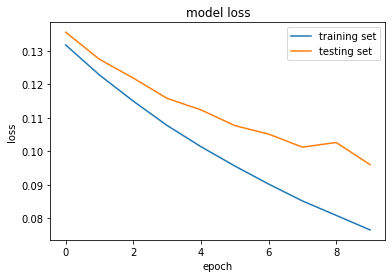

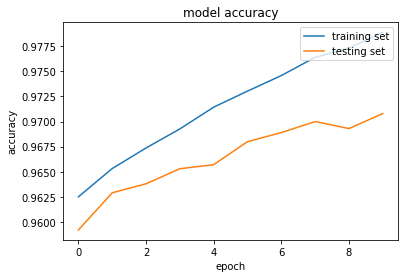

In [79]:
# History for loss

# START CODE HERE
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training set', 'testing set'], loc='upper right')


# END CODE HERE
plt.show()

#score = model.evaluate(x_test, y_test, verbose=0)
# History for accuracy

# START CODE HERE
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training set', 'testing set'], loc='upper right')


# END CODE HERE
plt.show()


##**Q8. Check the predictions of your model**

This question is only to see what your model predicts, and if this is correct. No need to implement here, just run the cell and check your results!

313/313 [==============================] - 1s 3ms/step
According to your model, the handwritten number shown is 7.


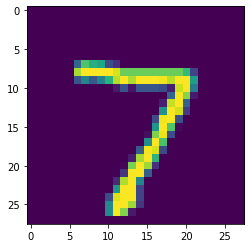

In [71]:
plt.imshow(x_test[0])
print("According to your model, the handwritten number shown is {}.".format(np.argmax(model.predict(x_test_reshape)[0])))

313/313 [==============================] - 1s 3ms/step
According to your model, the handwritten number shown is 6.


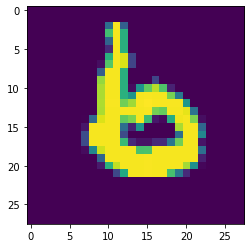

In [72]:
plt.imshow(x_test[587])
print("According to your model, the handwritten number shown is {}.".format(np.argmax(model.predict(x_test_reshape)[587])))

## **Q9. What did you learn from this assignment?**

Your feedback can help us to make this module better. In this question, you need to list out the difficulties and how you overcome them when doing the assignment. You can also talk about what you have learned and how do you think we should improve the assignment. This section is graded. Please type the comments in the text cell below and list them in bullet points. (**3 marks**)

Please enter your comments here by double-clicking on this text cell:
* I learnt how to implement a neural network using keras. This also shows how important APIs are as although I don't fully understand the mathematical details behind a neural network, I am still able to create a neural network using keras API.
* Not sure if it is intended, but the assignment made us calculate the normalized value and also use one-hot encoding for the y-values. However, it doesn't seem to be used in the later parts of fitting and testing the model. So I went ahead and used the normalized and one-hot encoding values myself. Perhaps it could be made clearer if we should be using the original data or if there isn't a point in us creating normalized and one-hot encoding values.
* I had difficulties understanding how the neural network should flow. But the diagram given was very helpful as it made it easier for me to understand how my data is flowing from one layer to another. The links provided also made it easier for me to find out how to implement it as I did not have to search for it myself which saves me alot of time in finding the correct page for information.



---


# End of your Assignment